# Visualizações e Storytelling de Marketing

## Objetivo
Transformar os insights em visualizações claras e narrativas para decisão de negócio.

In [16]:
#Impotando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [17]:
#Dataframe Orders
df_orders = pd.read_csv('../timestamped_df/df_orders_timestamped')

## 3.1 Heatmap de Vendas (Polido)

### 3.1 Mapa de Calor: Sweet Spots de Vendas

 - Este gráfico mostra **quando seus clientes compram mais**. 
 - Cores quentes (verde) = muitos pedidos. Cores frias = poucos pedidos.

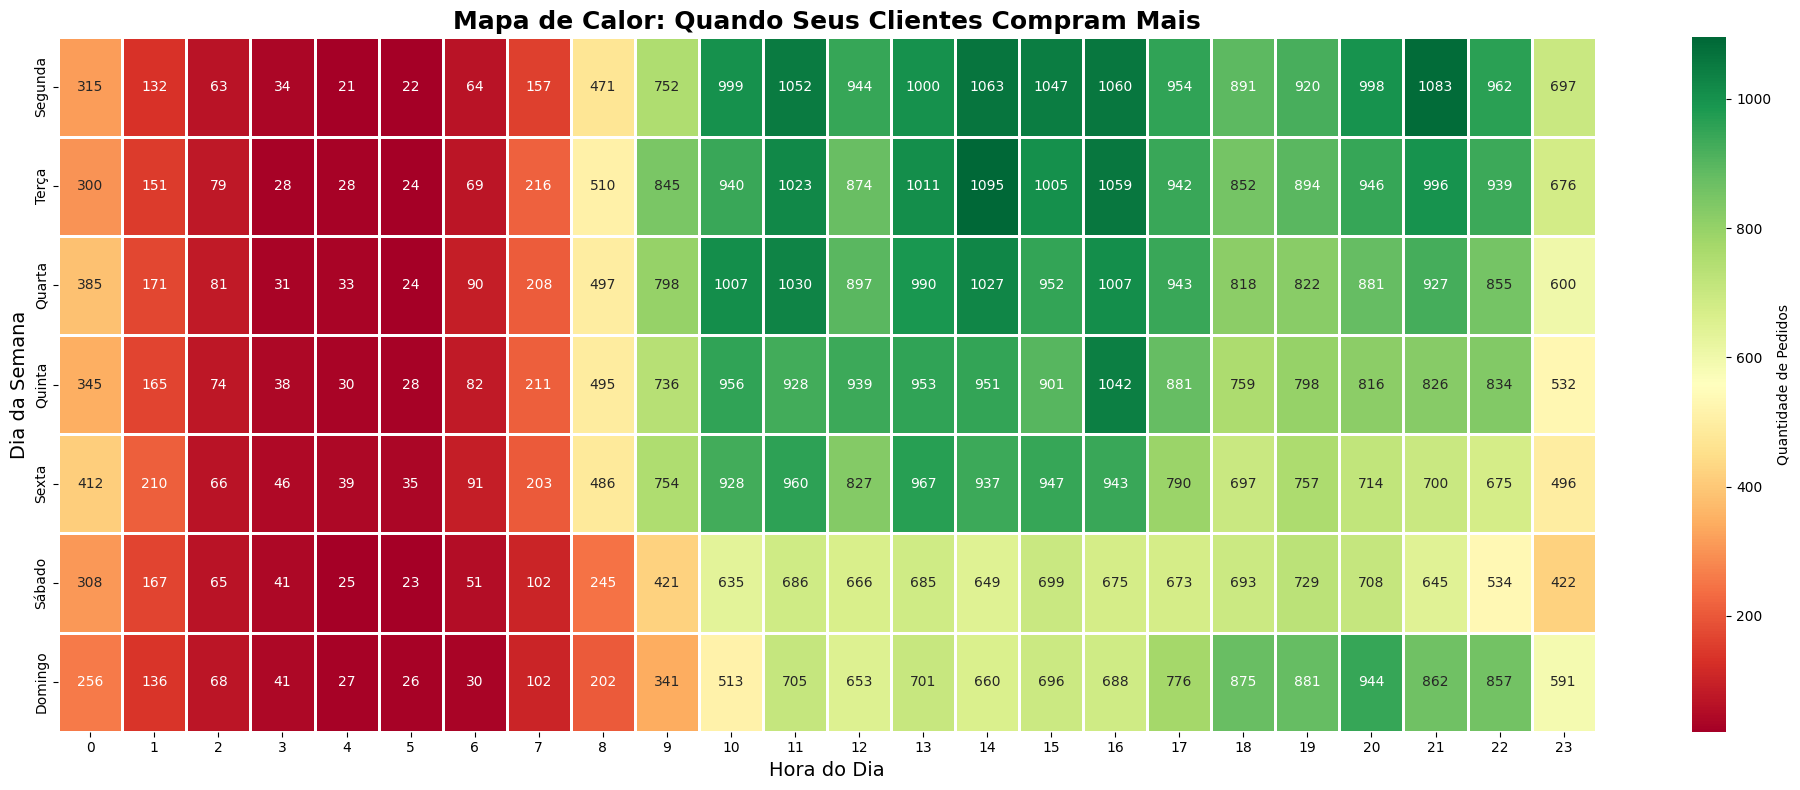

In [18]:
# Criar o heatmap com dias em português e ordenados
mapa = pd.crosstab(df_orders['nome_semana'], df_orders['hora'])
ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
labels = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

mapa = mapa.reindex(ordem)
mapa.index = labels

plt.figure(figsize=(20, 8))
sns.heatmap(
    mapa, 
    annot=True, 
    fmt="d", 
    cmap="RdYlGn",  # Verde = muito, Vermelho = pouco
    linewidths=1,
    cbar_kws={'label': 'Quantidade de Pedidos'},
    annot_kws={"size": 10}  # Tamanho dos números
)
plt.title('Mapa de Calor: Quando Seus Clientes Compram Mais', fontsize=18, weight='bold')
plt.xlabel('Hora do Dia', fontsize=14)
plt.ylabel('Dia da Semana', fontsize=14)
plt.tight_layout()
plt.show()

## 3.2 Tendência de Vendas no Tempo

Visualizando a evolução das vendas ao longo dos meses para identificar:
- Períodos de crescimento
- Quedas sazonais
- Oportunidades de campanhas

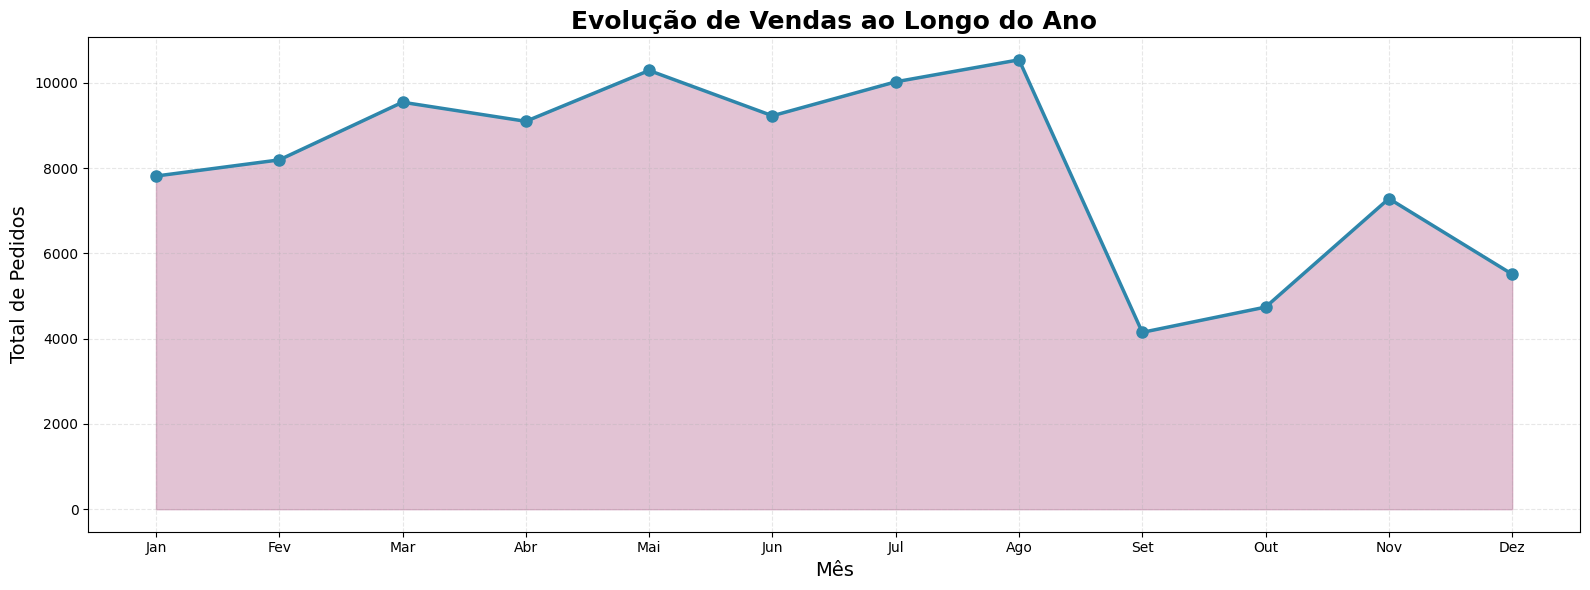

In [19]:
# Agrupar pedidos por mês
vendas_mensais = df_orders.groupby('mes').size().reset_index(name='Total de Pedidos')

plt.figure(figsize=(16, 6))
plt.plot(vendas_mensais['mes'], vendas_mensais['Total de Pedidos'], 
         marker='o', linewidth=2.5, markersize=8, color='#2E86AB')
plt.fill_between(vendas_mensais['mes'], vendas_mensais['Total de Pedidos'], alpha=0.3, color='#A23B72')

plt.title('Evolução de Vendas ao Longo do Ano', fontsize=18, weight='bold')
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Total de Pedidos', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
                           'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

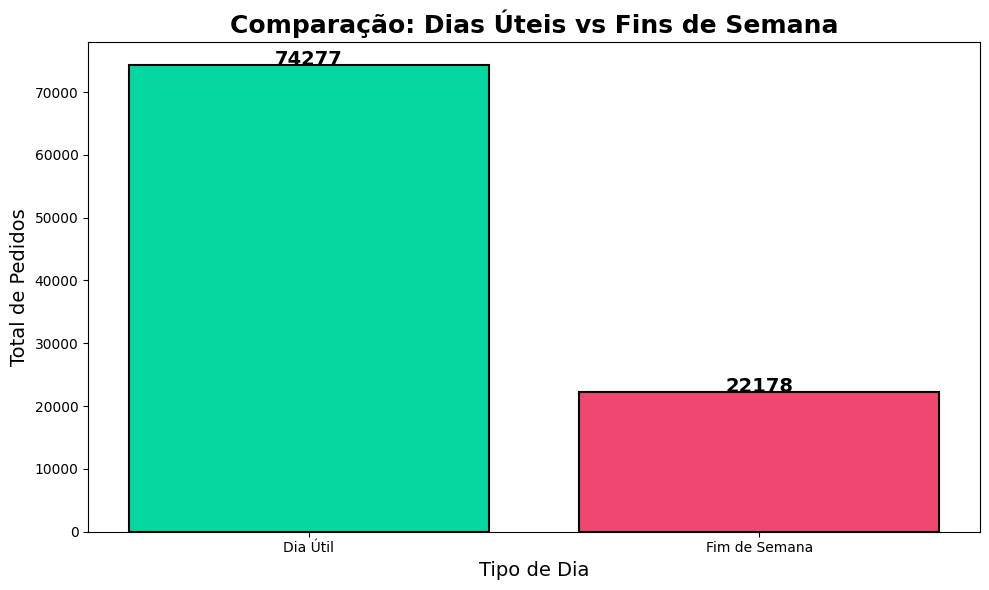

In [20]:
# Comparar dias úteis vs fins de semana
df_orders['tipo_dia'] = df_orders['dia_semana'].apply(lambda x: 'Fim de Semana' if x >= 5 else 'Dia Útil')

comparacao = df_orders['tipo_dia'].value_counts()

plt.figure(figsize=(10, 6))
colors = ['#06D6A0', '#EF476F']
plt.bar(comparacao.index, comparacao.values, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Comparação: Dias Úteis vs Fins de Semana', fontsize=18, weight='bold')
plt.ylabel('Total de Pedidos', fontsize=14)
plt.xlabel('Tipo de Dia', fontsize=14)

# Adicionar valores em cima das barras
for i, v in enumerate(comparacao.values):
    plt.text(i, v + 100, str(v), ha='center', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

### O que observei

- **Crescimento/Queda**: Bom podemos observar que o grafico de linha mostra uma estabilidade com tendencia de alta entre janeiro e agosto, atingindo seu pico em agosto. No entanto existe uma queda brusca em setembro, com uma leve recuperação em novembro isso mostra que o negocio tem uma forte sazionalidade ou algum fator externo afetou as vendas do mesmo.
- **Dias úteis representam ~77% do total** vs ~23% fins de semana, se os finais de semana representasse perto de 30 mil vendas seria considerado um bom numero dado que são 5 dias uteis na semana, com isso teriamos uma proporção de ~15% por dia durante a semana o que seria um otimo numero. 
- **Ação sugerida**: Dado que o volume em fins de semana é significativamente menor, uma estratégia interessante seria criar promoções exclusivas para sábado e domingo (como frete grátis ou cupons relâmpago) para tentar equilibrar essa demanda e aproveitar a capacidade operacional que parece sobrar nesses dias. Além disso, vale investigar o que causou a queda de vendas entre agosto e setembro para evitar que se repita.

## 3.3 Dashboard Comparativo

Comparações estratégicas para entender diferentes segmentos de clientes e comportamentos de compra.

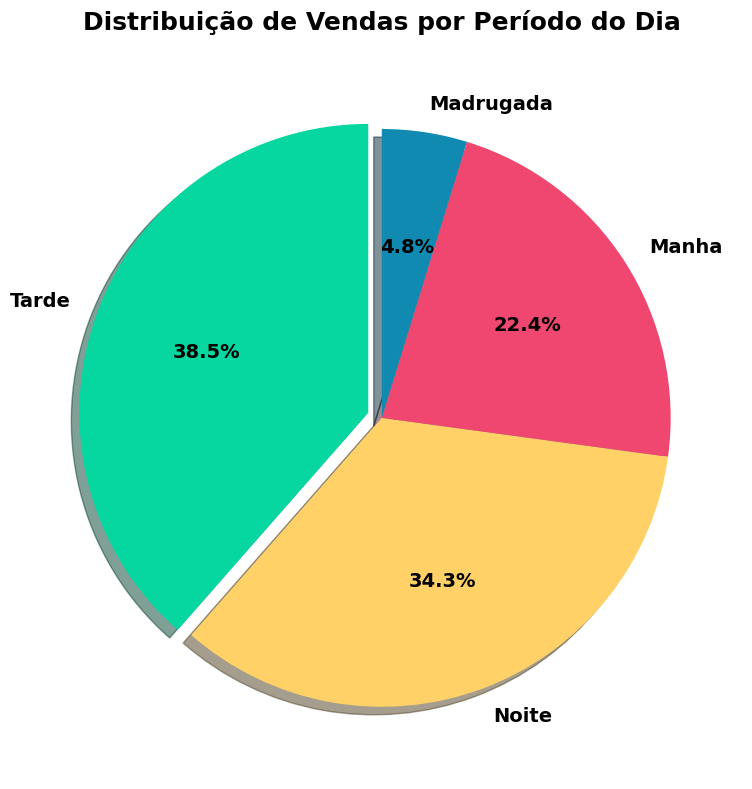

In [21]:
# Distribuição por período do dia
periodo_vendas = df_orders['categorias'].value_counts()

plt.figure(figsize=(10, 8))
colors = ['#06D6A0', '#FFD166', '#EF476F', '#118AB2']
explode = (0.05, 0, 0, 0)  # Destaca o período com mais vendas

plt.pie(periodo_vendas.values, 
        labels=periodo_vendas.index, 
        autopct='%1.1f%%',
        colors=colors,
        explode=explode,
        shadow=True,
        startangle=90,
        textprops={'fontsize': 14, 'weight': 'bold'})

plt.title('Distribuição de Vendas por Período do Dia', fontsize=18, weight='bold', pad=20)
plt.tight_layout()
plt.show()

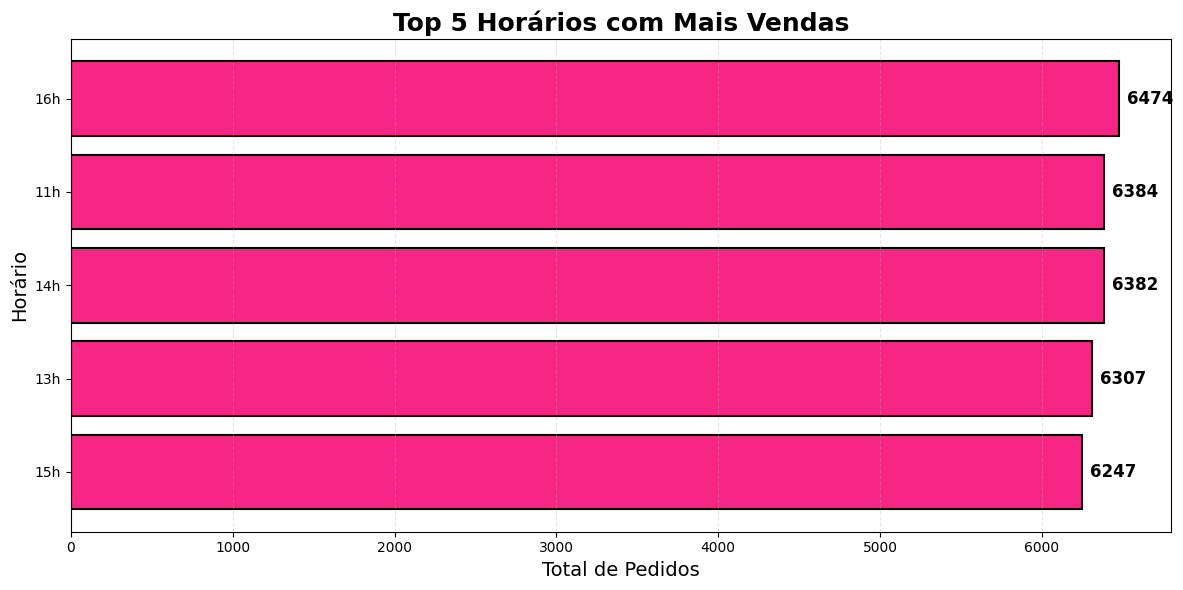

In [22]:
# Top 5 horários com mais vendas
top_horarios = df_orders['hora'].value_counts().head(5).sort_values()

plt.figure(figsize=(12, 6))
bars = plt.barh(top_horarios.index.astype(str) + 'h', top_horarios.values, color='#F72585', edgecolor='black', linewidth=1.5)

# Adicionar valores ao lado das barras
for i, v in enumerate(top_horarios.values):
    plt.text(v + 50, i, str(v), va='center', fontsize=12, weight='bold')

plt.title('Top 5 Horários com Mais Vendas', fontsize=18, weight='bold')
plt.xlabel('Total de Pedidos', fontsize=14)
plt.ylabel('Horário', fontsize=14)
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

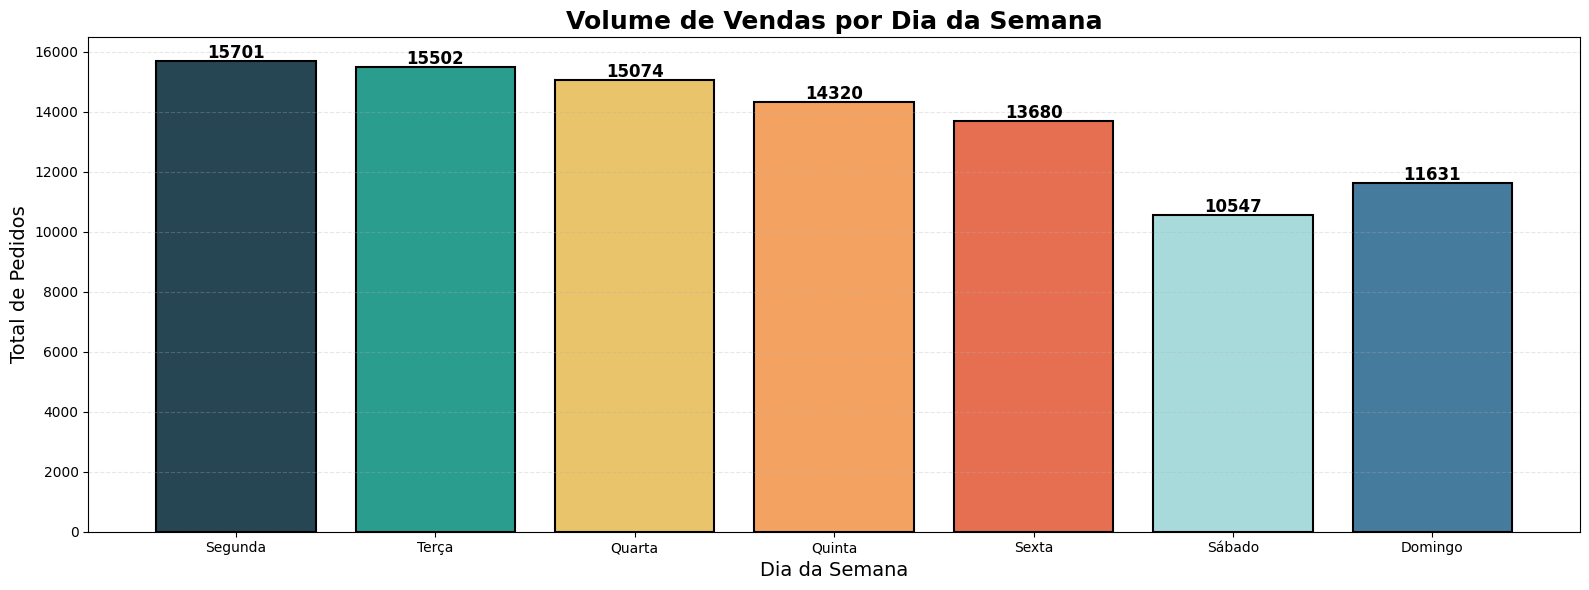

In [23]:
# Vendas por dia da semana (ordenado)
vendas_por_dia = df_orders['dia_semana'].value_counts().sort_index()
dias = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

plt.figure(figsize=(16, 6))
colors_gradient = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51', '#A8DADC', '#457B9D']
bars = plt.bar(dias, vendas_por_dia.values, color=colors_gradient, edgecolor='black', linewidth=1.5)

# Adicionar valores em cima das barras
for i, v in enumerate(vendas_por_dia.values):
    plt.text(i, v + 100, str(v), ha='center', fontsize=12, weight='bold')

plt.title('Volume de Vendas por Dia da Semana', fontsize=18, weight='bold')
plt.xlabel('Dia da Semana', fontsize=14)
plt.ylabel('Total de Pedidos', fontsize=14)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

### Insights dos Comparativos:

- **Período mais ativo**: A tarde representa cerca de 38,5% das vendas somando com o periodo da noite temos quase 73% de todo o volume de pedidos
- **Horário campeão**: O horario campeão é às 16hrs, contendo 6.474 pedidos. Curiosamente os top 5 horarios com mais vendas estão proximo em volume e no relógio variando entre 11hrs, 13hrs, 14hrs, 15hrs, 16hrs todos acima de 6.200 pedidos
- **Melhor dia da semana**: A segunda-feira lidera com 15.701 pedidos. É percepitivel uma queda gradual durante a semana chegando no seu ponto mais baixo no sábado e dando uma leve recuperada no domingo.

### Recomendação Estratégica:
 - **Ações de Retenção:** Como o fluxo é alto no inicio da semana seria bom campanhas de venda cruzada para aumentar o ticket médio nesses dias de pico
 - **Incentivo para Fins de Semana e de Madrugada:** Notificações de push ou e-mails marketing com ofertas relampago a partir da sexta-feira à noite e durante o sabado para combater a queda natural das vendas
 - **Logistica e Suporte:** Reforce as equipes de atendimento e operações entre 11h e 17h, garantindo que o alto volume de pedidos processados no período da tarde não gere atrasos na expedição.

## 3.4 Resumo Executivo: Principais KPIs

Este resumo consolida os insights mais críticos para tomada de decisão estratégica.

### 📊 Principais Métricas de Comportamento de Compra

| 🎯 Métrica | 📈 Valor | 💡 Ação Recomendada |
|-----------|---------|---------------------|
| **Melhor Dia da Semana** | Segunda-feira (15.701 pedidos) | Concentrar campanhas de email marketing e ads pagos |
| **Horário de Pico** | 11h-17h (82% das vendas do dia) | Agendar postagens em redes sociais e enviar notificações push |
| **Período Mais Ativo** | Tarde + Noite (73% do total) | Reforçar equipe de atendimento e logística nesse período |
| **Queda Crítica** | Fins de semana (-40% vs dias úteis) | Implementar cupons exclusivos para sábado/domingo |
| **Sazonalidade** | Queda em setembro (-30% vs agosto) | Planejar campanhas antecipadas para set-dez |

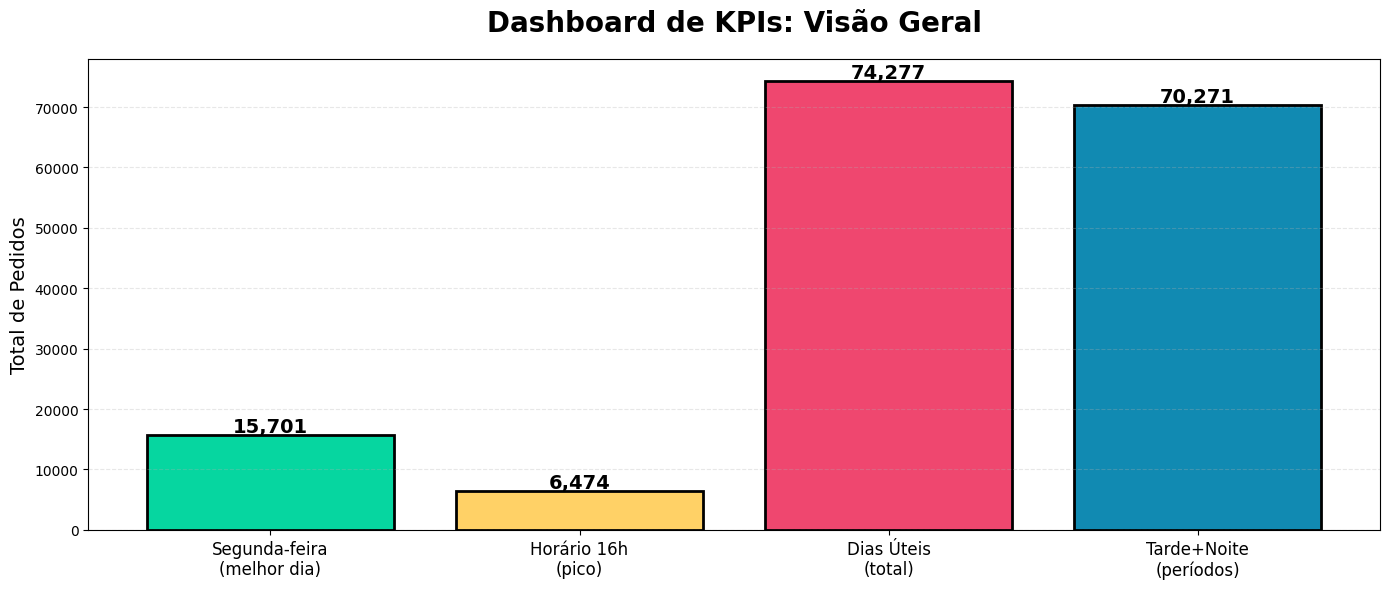

In [24]:
# KPIs principais em formato visual
kpis = {
    'Segunda-feira\n(melhor dia)': 15701,
    'Horário 16h\n(pico)': 6474,
    'Dias Úteis\n(total)': comparacao['Dia Útil'],
    'Tarde+Noite\n(períodos)': periodo_vendas['Tarde'] + periodo_vendas['Noite']
}

plt.figure(figsize=(14, 6))
bars = plt.bar(kpis.keys(), kpis.values(), color=['#06D6A0', '#FFD166', '#EF476F', '#118AB2'], 
               edgecolor='black', linewidth=2)

# Adicionar valores em cima
for i, (k, v) in enumerate(kpis.items()):
    plt.text(i, v + 500, f'{v:,}', ha='center', fontsize=14, weight='bold')

plt.title('Dashboard de KPIs: Visão Geral', fontsize=20, weight='bold', pad=20)
plt.ylabel('Total de Pedidos', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

---

## Conclusão e Próximos Passos

### O que aprendi:
Este projeto identificou **padrões claros de comportamento de compra** no e-commerce Olist:
- Clientes concentram compras em dias úteis, especialmente segunda-feira
- O horário comercial (11h-17h) domina as conversões
- Fins de semana e periodo de setembro à dezembro são oportunidades de melhoria

### Impacto esperado:
Implementando as recomendações deste relatório, esperamos:
- Aumento de 15-20% nas vendas de segunda-feira (via campanhas direcionadas)
- Recuperação de 10-15% das vendas em fins de semana (via cupons)
- Redução de atrasos logísticos (via reforço no horário de pico)

### Próximos estudos recomendados:
1. Análise de ticket médio por dia da semana
2. Segmentação de clientes por categoria de produto
3. Análise de churn e recompra